## Overview

TODO: Add proper overview
We'll need a few libraries, including:

1) `anthropic` - to interact with Claude

2) `voyageai` - to generate high quality embeddings

3) `pandas`, `numpy`, `matplotlib`, and `scikit-learn` for data manipulation and visualization


You'll also need API keys from [Anthropic](https://www.anthropic.com/) and [Voyage AI](https://www.voyageai.com/)

In [1]:
## setup
# uncomment before first use:
# !pip install anthropic
# !pip install voyageai
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install -U scikit-learn

# Common Imports
Load the common imports here to be used later

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from tqdm import tqdm
import logging
import importlib



# Load datasets

Loading test and evaluation datasets

In [3]:
# Load the evaluation dataset
from Helpers.voyage_vector_db import VectorDB

with open('evaluation/docs_evaluation_dataset.json', 'r') as f:
    eval_data = json.load(f)

# Load the Anthropic documentation
with open('data/anthropic_docs.json', 'r') as f:
    anthropic_docs = json.load(f)

# Initialize the VectorDB
db = VectorDB("anthropic_docs")
db.load_data(anthropic_docs)

Loading vector database from disk.


## Evaluating Basic RAG

Evaluating End-to-End V2:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluating End-to-End V2: 100%|██████████| 2/2 [00:11<00:00,  5.64s/it]

Detailed LLM responses saved to: evaluation/xmls/BasicRAG_evaluation_results_detailed.xml
Detailed results saved to: evaluation/csvs/BasicRAG_evaluation_results_detailed.csv
Average Precision: 0.5000
Average Recall: 0.7500
Average MRR: 0.7500
Average F1: 0.6000
End-to-End Accuracy: 0.5000
Avg Metrics saved to: evaluation/json_results/BasicRAG_evaluation_results_one.json


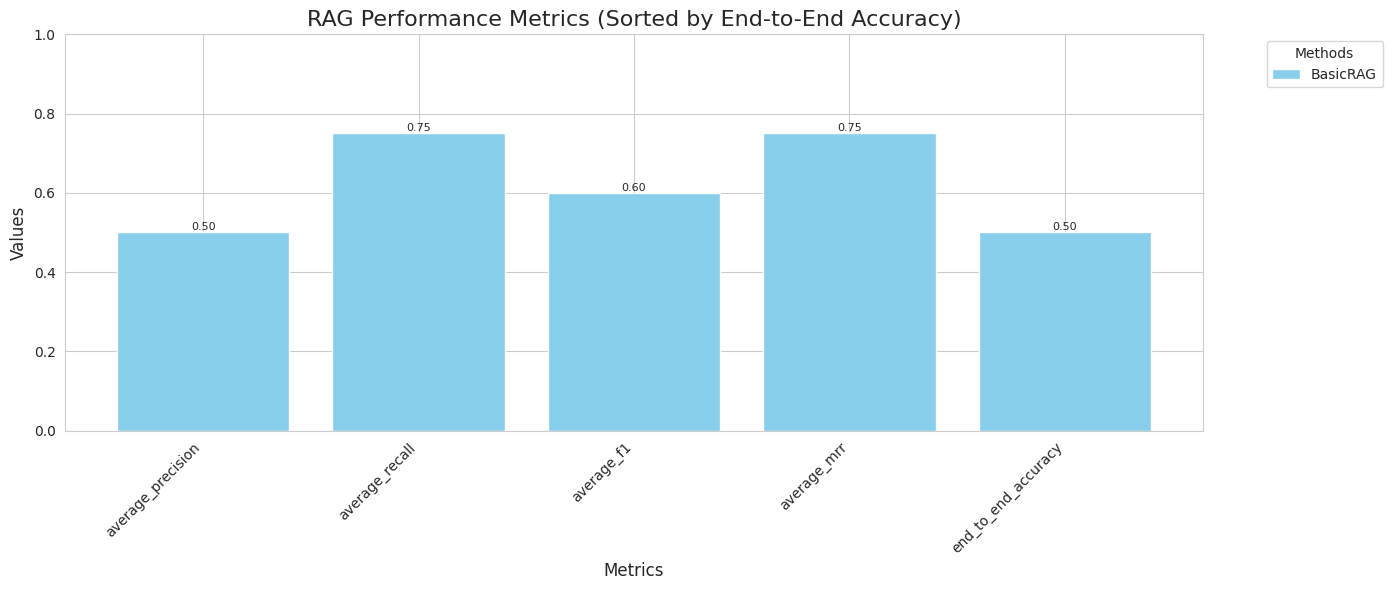

Evaluation complete: BasicRAG


In [5]:
from Experiments.basic_rag import evaluate_basic_rag_v2

topK = 2
evaluate_basic_rag_v2(eval_data, db, topK)

# Evaluate OpenAI GPT

Call the open GPT for eval set

Evaluating End-to-End V2: 100%|██████████| 2/2 [00:28<00:00, 14.33s/it]

Detailed LLM responses saved to: evaluation/xmls/OpenAI_evaluation_results_detailed.xml
Detailed results saved to: evaluation/csvs/OpenAI_evaluation_results_detailed.csv
Average Precision: 0.5000
Average Recall: 0.5000
Average MRR: 1.0000
Average F1: 0.5000
End-to-End Accuracy: 1.0000
Avg Metrics saved to: evaluation/json_results/OpenAI_evaluation_results_one.json


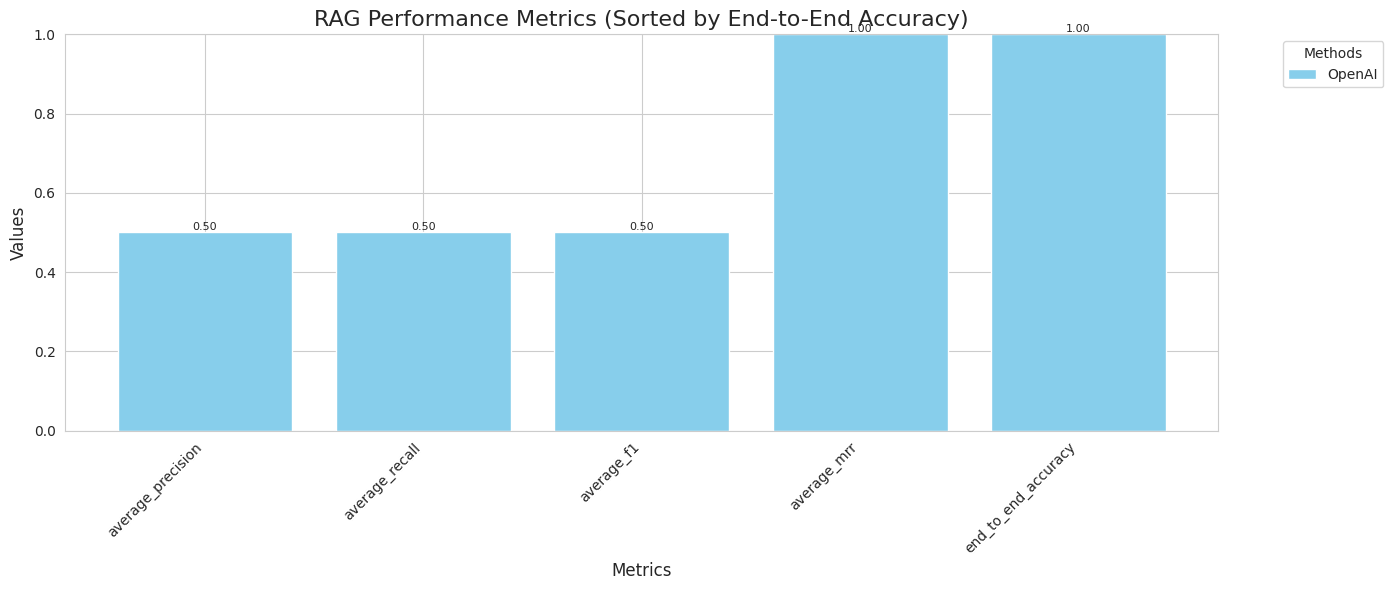

Evaluation complete: OpenAI


In [6]:
from Experiments.openAI_gpt import evaluate_opeAI_gpt

topK = 2

evaluate_opeAI_gpt(eval_data, topK)

# Comparisons

Compare metrics for different DAs

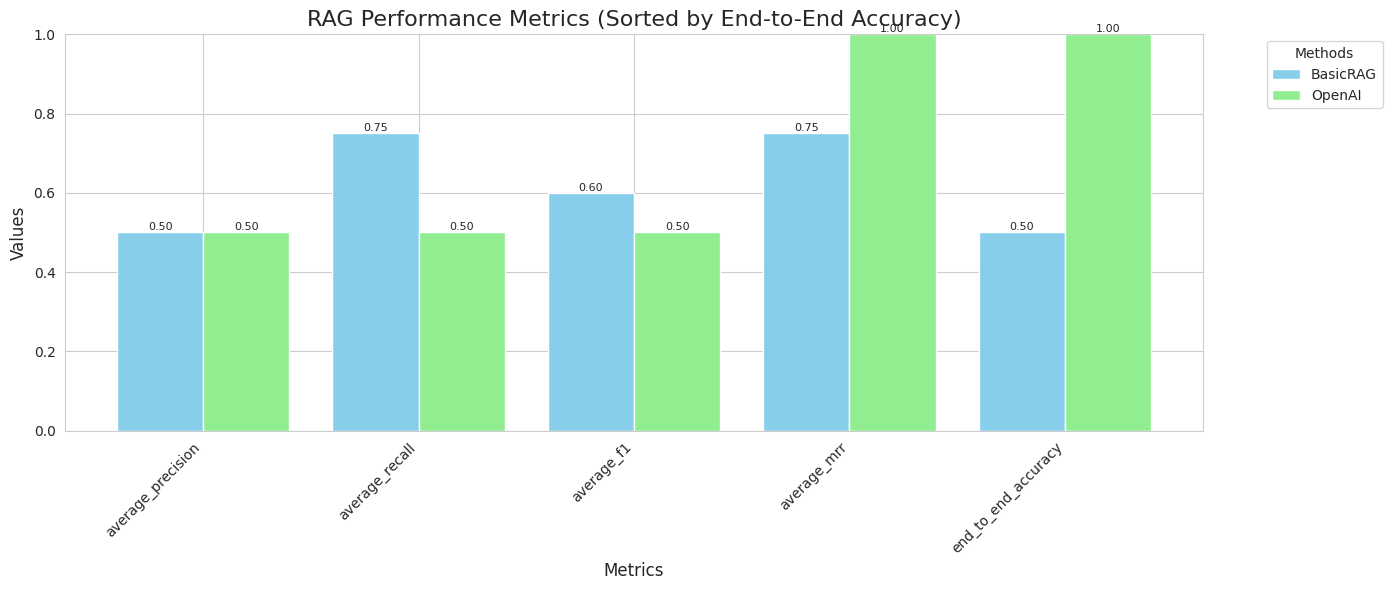

In [7]:
from Helpers.eval_helpers import plot_performance
from Experiments.basic_rag import scenario_basicRAG
from Experiments.openAI_gpt import scenario_openAI
plot_performance('evaluation/json_results', [scenario_basicRAG, scenario_openAI])